**Importing necessary libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Now we will load the dataset and read the data which is in the form of csv.**

In [2]:
#Reading the dataset.
data= pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

#Showing the top5
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Exploring the dataset shapes and datatypes.**

In [3]:
#Exploring the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Now we are changing the datatype of reservation status date from oject to date&time.**

In [4]:
#Changing the datatype
data['reservation_status_date']= pd.to_datetime(data['reservation_status_date'])


**We are loading the data to see the basic statistics.**

In [5]:
#Now we are reading the basic statistics of the dataset.
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


**Checking for the missing values in the dataset.**

In [6]:
#Checking the missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Question 1: Relationship Between Lead Time and Cancellation?**

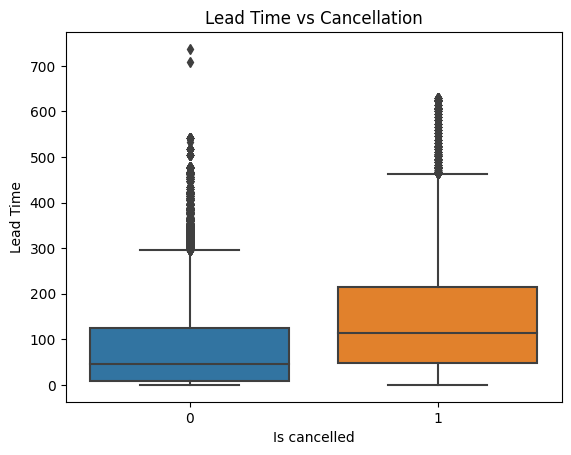

In [7]:
#ploting the relationship of lead time and cancellation.
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time vs Cancellation') #labelling the title. 
plt.xlabel('Is cancelled') #labelling the xlabel.
plt.ylabel('Lead Time') #labelling the ylabel.
plt.show()


**Canceled bookings tend to have a higher lead time compared to non-canceled bookings, this suggests that customers who book far in advance are more likely to cancel their bookings.**

**Question 2: What is the relationship between deposit type and cancellation?**

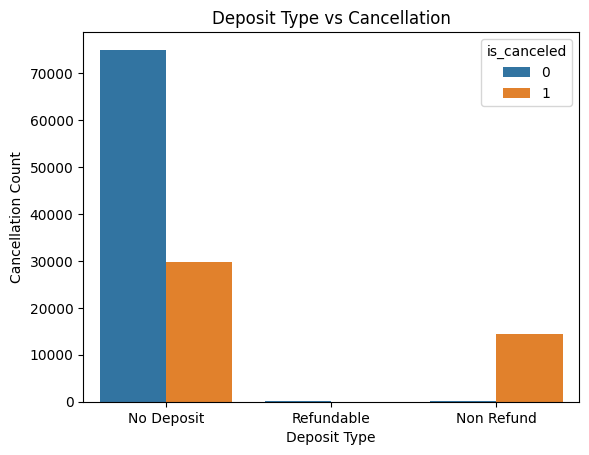

In [8]:
#ploting the relationship of deposit and cancellation.
sns.countplot(x='deposit_type', hue='is_canceled', data=data)
plt.title('Deposit Type vs Cancellation') #labelling the title. 
plt.xlabel('Deposit Type') #labelling the xlabel.
plt.ylabel('Cancellation Count') #labelling the ylabel.
plt.show()

**The majority of bookings with "No Deposit" have higher cancellation rates. Bookings with "Non Refund" and "Refundable" deposits have lower cancellation rates, indicating that customers are less likely to cancel when they have a financial commitment.**

**Question 3: What is the relationship between market segment and cancellation?**

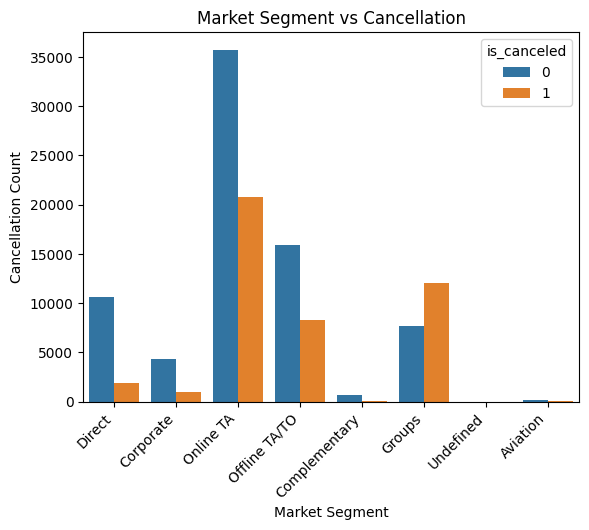

In [9]:
#ploting the relationship of market segment and cancellation.
sns.countplot(x='market_segment', hue='is_canceled', data=data)
plt.title('Market Segment vs Cancellation') #labelling the title.
plt.xlabel('Market Segment') #labelling the xlabel.
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cancellation Count') #labelling the ylabel.
plt.show()

**The "Online TA" (Travel Agents) segment has the highest number of cancellations. Other segments like "Groups" and "Corporate" have relatively lower cancellation rates.This indicates that bookings made through online travel agents are more prone to cancellations.**

**Question 4: What is the relationship between previous cancellations and cancellations?**

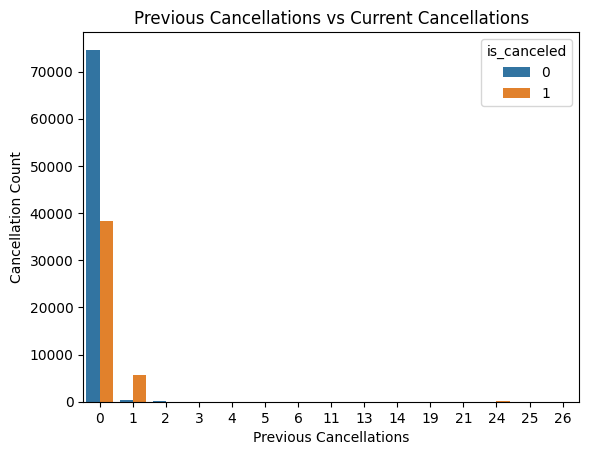

In [10]:
#ploting the relationship of previous cancellation and cancellation.
sns.countplot(x='previous_cancellations', hue='is_canceled', data=data)
plt.title('Previous Cancellations vs Current Cancellations') #labelling the title.
plt.xlabel('Previous Cancellations') #labelling the xlabel.
plt.ylabel('Cancellation Count') #labelling the ylabel.
plt.show()


**Customers with previous cancellations are more likely to cancel again. The cancellation increases significantly if a customer has previously canceled multiple times.**

**Question 5: How much does the price in hotels vary over the year?**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


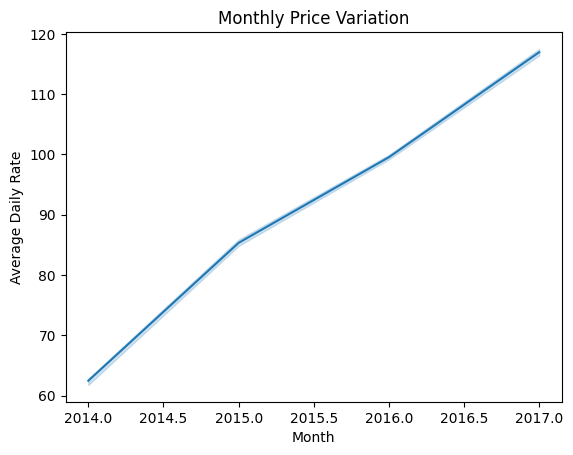

In [11]:
#ploting the price variation.
data['year'] = pd.to_datetime(data['reservation_status_date']).dt.year
sns.lineplot(x='year', y='adr', data=data)
plt.title('Monthly Price Variation') #labelling the title.
plt.xlabel('Month') #labelling the xlabel.
plt.ylabel('Average Daily Rate') #labelling the ylabel.
plt.show()

**There is a clear variation in prices over the year.
Prices tend to be higher during peak holiday seasons and lower during off-peak periods.
This indicates seasonal pricing strategies employed by hotels to maximize revenue.**

**Summary**

**The analysis shows that bookings made well in advance, those with "No Deposit," and those through online travel agents have higher cancellation rates. Customers with prior cancellations are more likely to cancel again. Prices vary seasonally, peaking during holidays and dropping in off-peak times. These insights highlight the need for targeted strategies to manage cancellations and optimize pricing year-round.**